In [1]:
# importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import Dataset using Pandas
df=pd.read_csv("Walmart.csv")
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df1=df

<AxesSubplot: >

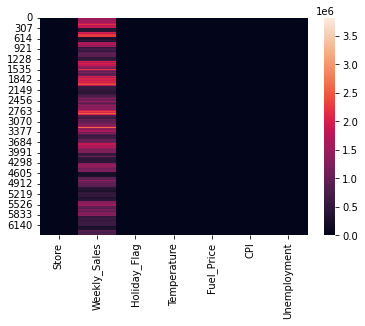

In [6]:
# Check corealtion using heat map
sns.heatmap(df1.drop(["Date"],axis=1))

In [7]:
# Change Date Column datatype to Date Type from Object type
df["Date"]=pd.to_datetime(df['Date'],format='%d-%m-%Y')


C:\Users\Bhavanasri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Weekly_Sales'>

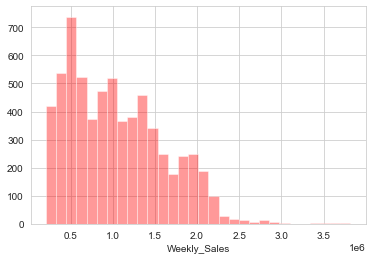

In [8]:
# check visualisations
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(df['Weekly_Sales'], kde = False, color ='red', bins = 30)

C:\Users\Bhavanasri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


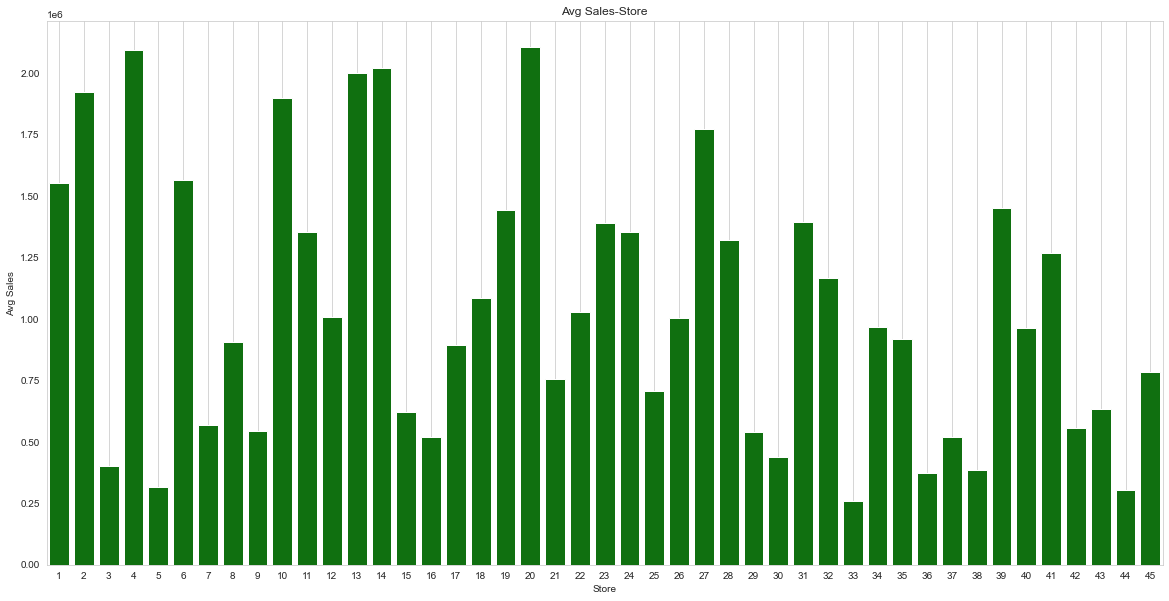

In [9]:
weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()
plt.figure(figsize=(20,10))
sns.barplot(weekly_sales.index, weekly_sales.values,color='g')
plt.grid()
plt.xlabel("Store")
plt.ylabel("Avg Sales")
plt.title("Avg Sales-Store")
plt.show()

In [10]:
df=df.loc[:,['Date','Store','Weekly_Sales']]

In [11]:
df.head()

Date  Store  Weekly_Sales
0 2010-02-05      1    1643690.90
1 2010-02-12      1    1641957.44
2 2010-02-19      1    1611968.17
3 2010-02-26      1    1409727.59
4 2010-03-05      1    1554806.68

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6435 non-null   datetime64[ns]
 1   Store         6435 non-null   int64         
 2   Weekly_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 150.9 KB


In [13]:
df.describe()

Store  Weekly_Sales
count  6435.000000  6.435000e+03
mean     23.000000  1.046965e+06
std      12.988182  5.643666e+05
min       1.000000  2.099862e+05
25%      12.000000  5.533501e+05
50%      23.000000  9.607460e+05
75%      34.000000  1.420159e+06
max      45.000000  3.818686e+06

In [14]:
df=df.sort_values(by="Date", key=pd.to_datetime)

In [15]:
# Create a variable to select the store that has to be forecasted

Store=int(input("Enter the Store Number: "))
Store

Enter the Store Number: 1


1

In [16]:
#Create a DataFrame having the values of the Store Selected
Store_Forecast=df[df["Store"]==Store]
Store_Forecast.head()

Date  Store  Weekly_Sales
0 2010-02-05      1    1643690.90
1 2010-02-12      1    1641957.44
2 2010-02-19      1    1611968.17
3 2010-02-26      1    1409727.59
4 2010-03-05      1    1554806.68

In [17]:
Store_Forecast.sort_index(inplace=True)
Store_Forecast.head()

Date  Store  Weekly_Sales
0 2010-02-05      1    1643690.90
1 2010-02-12      1    1641957.44
2 2010-02-19      1    1611968.17
3 2010-02-26      1    1409727.59
4 2010-03-05      1    1554806.68

In [18]:
Store_Forecast.set_index("Date",inplace=True)

In [19]:
Store_Forecast=Store_Forecast.drop(["Store"],axis=1)

<AxesSubplot: xlabel='Date'>

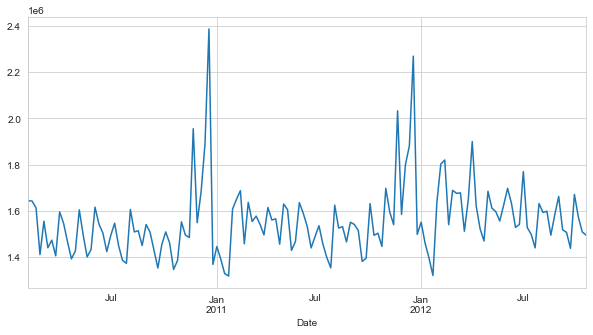

In [20]:
Store_Forecast["Weekly_Sales"].plot(figsize=(10,5))

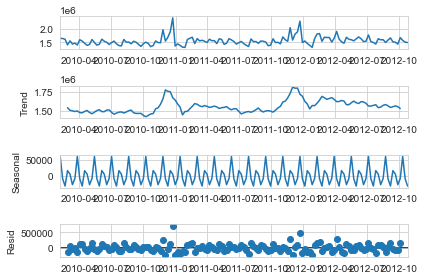

In [21]:
# check trends and Seasonality using Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(Store_Forecast,period=7)
decompose_result.plot();

In [22]:
# Adfuler test 
from statsmodels.tsa.stattools import adfuller
result=adfuller(Store_Forecast["Weekly_Sales"])
print(result)

(-5.102186145192286, 1.3877788330759535e-05, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3412.7325502876756)


In [23]:
# create a function to remove trend and seasonality
def rolling (data_f):
    rolling_mean=data_f.rolling(window=7).mean()
    rolling_mean_detrended = data_f - rolling_mean
    rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()
    rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()
    return rolling_mean_detrended_diff

In [24]:
#Condition to check hypothesis testing
if result[1]>0.05:
    Store_Forecast=rolling(Store_Forecast)
else:
    pass

In [25]:
from pmdarima import auto_arima

In [26]:
# check the best fit p,q,d values using auto arima
order = auto_arima(Store_Forecast['Weekly_Sales'], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3819.024, Time=3.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3850.005, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3838.724, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3831.432, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3848.013, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3819.410, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3821.284, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3817.475, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3818.117, Time=0.30 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3810.990, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3809.486, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3810.431, Time=0.19 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3810.637, Time=2.33 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1897.843
Date:                Fri, 18 Nov 2022   AIC                           3807.686
Time:                        21:34:06   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.76e+37. Standard errors may be unstable.
"""

In [27]:
# Divide into train and test dataset
train = Store_Forecast.iloc[:110]['Weekly_Sales']
test = Store_Forecast.iloc[111:]['Weekly_Sales']
test

Date
2012-03-23    1511068.07
2012-03-30    1649604.63
2012-04-06    1899676.88
2012-04-13    1621031.70
2012-04-20    1521577.87
2012-04-27    1468928.37
2012-05-04    1684519.99
2012-05-11    1611096.05
2012-05-18    1595901.87
2012-05-25    1555444.55
2012-06-01    1624477.58
2012-06-08    1697230.96
2012-06-15    1630607.00
2012-06-22    1527845.81
2012-06-29    1540421.49
2012-07-06    1769854.16
2012-07-13    1527014.04
2012-07-20    1497954.76
2012-07-27    1439123.71
2012-08-03    1631135.79
2012-08-10    1592409.97
2012-08-17    1597868.05
2012-08-24    1494122.38
2012-08-31    1582083.40
2012-09-07    1661767.33
2012-09-14    1517428.87
2012-09-21    1506126.06
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74
Name: Weekly_Sales, dtype: float64

In [28]:
len(train)

110

In [29]:
# Build SARIMAX Model on the train dataset
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
model = SARIMAX(train, order=(2,1,3), seasonal_order=(2,1,3,48))
model = model.fit()

C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    1.740098e+06
2012-10-05    1.759776e+06
2012-10-12    1.743436e+06
2012-10-19    1.771923e+06
2012-10-26             NaN
Name: predict, Length: 143, dtype: float64


<AxesSubplot: xlabel='Date'>

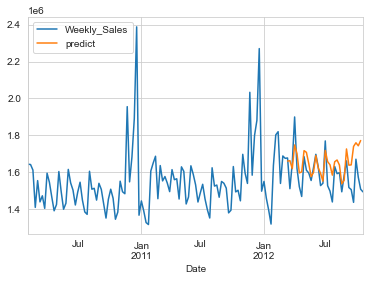

In [30]:
# Predict the forecast using test dataset
Store_Forecast['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
print(Store_Forecast["predict"])
Store_Forecast[['Weekly_Sales','predict']].plot()

<AxesSubplot: >

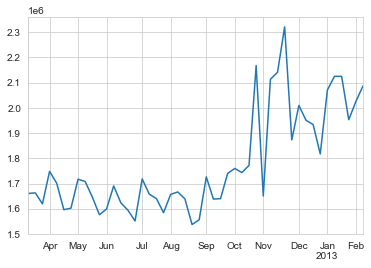

In [31]:
# Forecast for the next 12 weeks
forecast=model.forecast(steps=48)
#store.plot()
forecast.plot()

In [32]:
predict=Store_Forecast["predict"].dropna()
print(type(predict))
print(type(test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [33]:
Test_Pred=pd.DataFrame([test,predict])
T=Test_Pred.transpose().dropna()
T

Weekly_Sales       predict
Date                                  
2012-03-23    1511068.07  1.662884e+06
2012-03-30    1649604.63  1.619510e+06
2012-04-06    1899676.88  1.748107e+06
2012-04-13    1621031.70  1.701317e+06
2012-04-20    1521577.87  1.596426e+06
2012-04-27    1468928.37  1.602125e+06
2012-05-04    1684519.99  1.717190e+06
2012-05-11    1611096.05  1.707902e+06
2012-05-18    1595901.87  1.646490e+06
2012-05-25    1555444.55  1.576224e+06
2012-06-01    1624477.58  1.599043e+06
2012-06-08    1697230.96  1.690571e+06
2012-06-15    1630607.00  1.623853e+06
2012-06-22    1527845.81  1.594251e+06
2012-06-29    1540421.49  1.551553e+06
2012-07-06    1769854.16  1.718361e+06
2012-07-13    1527014.04  1.657697e+06
2012-07-20    1497954.76  1.640291e+06
2012-07-27    1439123.71  1.584439e+06
2012-08-03    1631135.79  1.657016e+06
2012-08-10    1592409.97  1.666533e+06
2012-08-17    1597868.05  1.639101e+06
2012-08-24    1494122.38  1.537489e+06
2012-08-31    1582083.40  1.556104e+06
2012-09-07    1661767.33  1.726327e+06
2012-09-14    1517428.87  1.638374e+06
2012-09-21    1506126.06  1.639978e+06
2012-09-28    1437059.26  1.740098e+06
2012-10-05    1670785.97  1.759776e+06
2012-10-12    1573072.81  1.743436e+06
2012-10-19    1508068.77  1.771923e+06

In [34]:
# Check the Model Accuracy 
forecast_errors=T["Weekly_Sales"]-T["predict"]
bias = sum(forecast_errors) * 1.0/len(T["Weekly_Sales"])
bias

-69970.330073061

In [35]:
from sklearn.metrics import r2_score
r2=r2_score(T["Weekly_Sales"],T["predict"])
r2

-0.3887213364896789

In [36]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(T["Weekly_Sales"],T["predict"])
mse = metrics.mean_squared_error(T["Weekly_Sales"],T["predict"])
print(mae,mse)

89195.16080349867 12969303930.186947


In [37]:
rmse = np.sqrt(mse)
rmse

113882.85178281648